In [1]:
from google.colab import files
files.upload()  # Upload kaggle.json


Saving data.csv.zip to data.csv.zip


{'data.csv.zip': b'PK\x03\x04-\x00\x00\x00\x08\x00\xc1\xae3O\xe01V|\xff\xff\xff\xff\xff\xff\xff\xff\x08\x00\x14\x00data.csv\x01\x00\x10\x00\x14\xe9\x01\x00\x00\x00\x00\x00\xea\xc1\x00\x00\x00\x00\x00\x00\xac\xbd\xcb\x8em\xc9\x91%6\x17\xa0\x7f\x10j\x1c8p7\x7fO9\xcfoh\x10U\x94D@E\x16H\xb6\xa4\xfe{\xd9z\xd8\xb9\xc9\xea\x9e\xa9\'\xf7\xe6\x8d\x8c8\xb1}\xbb\xbb=\x96-[\xf6/\x7f\xfe\xb7\x7f\xf9\xf9\x97\x7f\xfb\xf3\x1f\xff\x8f\xbf\xfc\xf5\xef\x7f\xfe{\xfe\xf7\xdf\xfe\xf8o\x7f\xfe\xaf\x7f\xff/\xff\xfe\xa7?\xfe%\xff\xf5\x8f?\xfd\xbf\xff\xf8\xaf\x7f\xfbS\xfd\xf3?\xfe\xf4\xb7?\xff\xfb\x9f\xfe\xf1\xa7\xbf\xd5\x17\xfe\xf8\xb7?\xfd\xb1\xfe\xfb\xef\xff\xfe\xd7\xbf\xfe\xe3\xff\xfc\xcb\x9f\xfe\xfe\xfd\xe9\x7f\xfd\xeb\xbf\xff\xc7\x1f\xff\xf5\x1f\xff\xfc\xa5\xbf\xfc\xeb\x1f\xff\xef?\xff\xe3\xbf\xfd\xf3\x17\xfe\xf4\xbf\xfd\xc7_\xff\xfc\x97\x7f|\xbf\xed\xef\xff\xed\xdf\xf3\xf7\xfc\xed\xfb]\xff\xfb\xdf\xf2s\xfe\xf8\x7f\xfd\x97\x7f\xcb_\xff\x97\xbf\xff\xf9\xaf\x7f\xa9\xff\xe1\xc7\xfd\xfb\x9f~\xf7\xb0\xfc\xc7\x

In [4]:
import pandas as pd

# Load dataset
df = pd.read_csv("data.csv.zip", compression='zip')  # Adjust filename/path if necessary
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
# Drop unnamed or irrelevant columns
df.drop(columns=['id', 'Unnamed: 32'], inplace=True)

# Encode target variable
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})  # M = Malignant, B = Benign

# Separate features and target
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']


In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)


In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [8]:
from sklearn.linear_model import LogisticRegression

# Initialize and fit model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_scaled, y_train)


LogisticRegression(random_state=42)

In [9]:
# L1 Regularization (Lasso-like)
log_reg_l1 = LogisticRegression(penalty='l1', solver='liblinear', random_state=42)
log_reg_l1.fit(X_train_scaled, y_train)

# L2 Regularization (Ridge-like)
log_reg_l2 = LogisticRegression(penalty='l2', solver='liblinear', random_state=42)
log_reg_l2.fit(X_train_scaled, y_train)


LogisticRegression(random_state=42, solver='liblinear')

In [10]:
log_reg_balanced = LogisticRegression(class_weight='balanced', random_state=42)
log_reg_balanced.fit(X_train_scaled, y_train)


LogisticRegression(class_weight='balanced', random_state=42)

In [11]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(log_reg, X_train_scaled, y_train, cv=5, scoring='accuracy')
print("Cross-validation Accuracy Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())


Cross-validation Accuracy Scores: [0.96703297 0.98901099 0.95604396 0.97802198 0.96703297]
Mean CV Accuracy: 0.9714285714285715


In [12]:
import numpy as np

feature_names = X.columns
coefficients = log_reg.coef_[0]

# Combine features with their corresponding coefficients
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

# Sort by absolute coefficient value
coef_df['Abs_Coefficient'] = np.abs(coef_df['Coefficient'])
coef_df.sort_values(by='Abs_Coefficient', ascending=False, inplace=True)

print(coef_df[['Feature', 'Coefficient']])


                    Feature  Coefficient
21            texture_worst     1.434093
10                radius_se     1.233325
28           symmetry_worst     1.061264
7       concave points_mean     0.952813
26          concavity_worst     0.911406
13                  area_se     0.909029
15           compactness_se    -0.906925
23               area_worst     0.900477
20             radius_worst     0.896968
6            concavity_mean     0.782298
12             perimeter_se     0.748295
22          perimeter_worst     0.723111
27     concave points_worst     0.703999
19     fractal_dimension_se    -0.593876
1              texture_mean     0.482219
17        concave points_se     0.482089
3                 area_mean     0.439950
5          compactness_mean    -0.439546
24         smoothness_worst     0.420207
11               texture_se    -0.407611
0               radius_mean     0.361150
2            perimeter_mean     0.353160
4           smoothness_mean     0.350622
18              

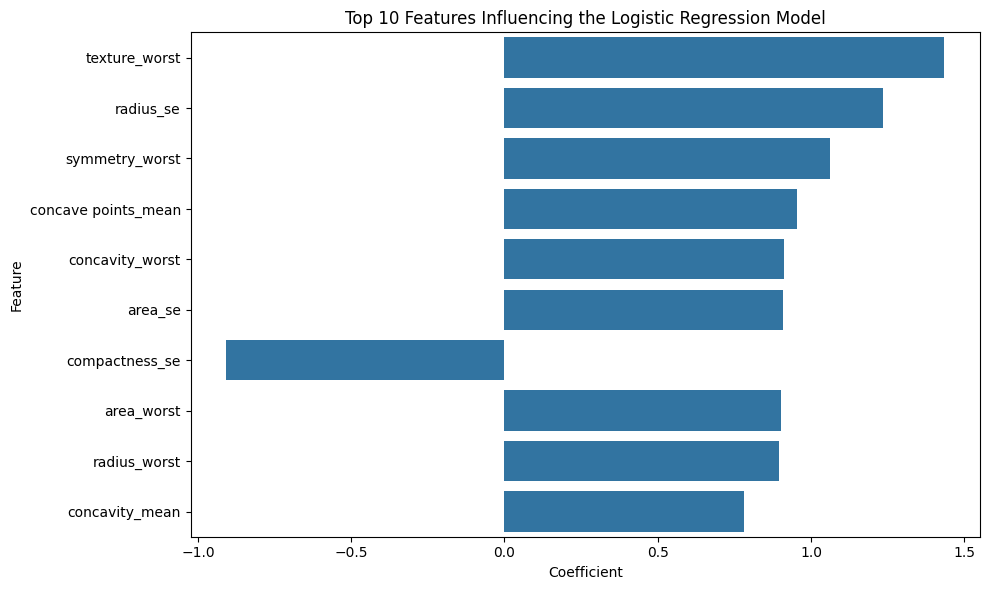

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coef_df.head(10))
plt.title("Top 10 Features Influencing the Logistic Regression Model")
plt.tight_layout()
plt.show()


In [14]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report

# Predict on test set
y_pred = log_reg.predict(X_test_scaled)

# Basic Metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

# Full classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9649122807017544
Precision: 0.975
Recall: 0.9285714285714286
F1 Score: 0.9512195121951219

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97        72
           1       0.97      0.93      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



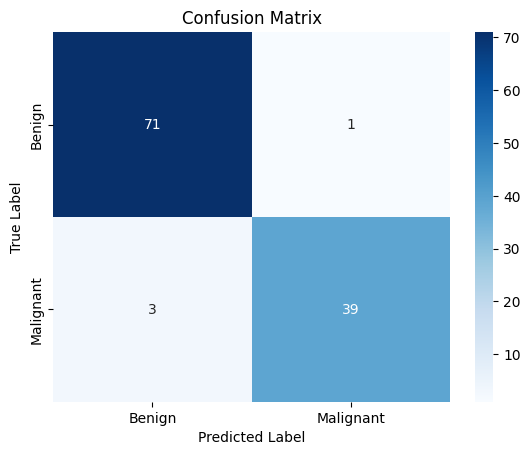

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


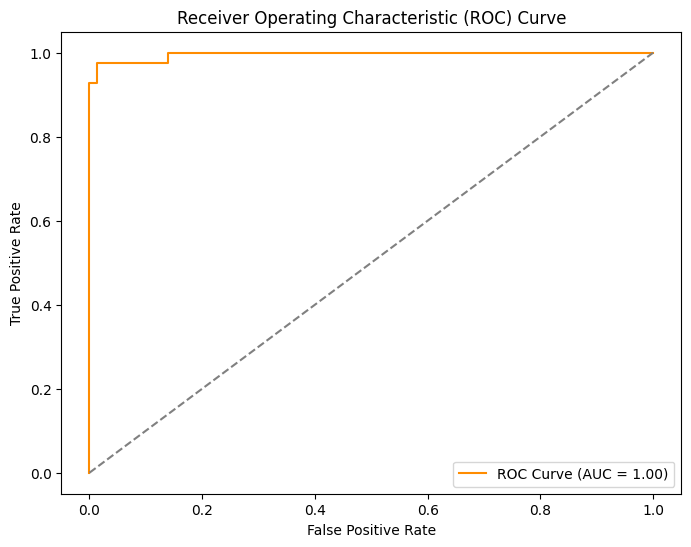

In [16]:
from sklearn.metrics import roc_auc_score, roc_curve

# Get probability scores for positive class
y_probs = log_reg.predict_proba(X_test_scaled)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = roc_auc_score(y_test, y_probs)

# Plot ROC curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0,1], [0,1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend()
plt.show()


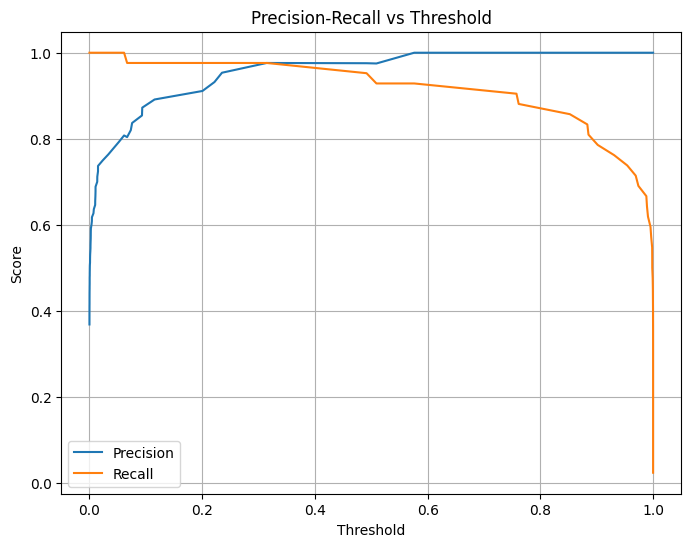

In [17]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_test, y_probs)

plt.figure(figsize=(8,6))
plt.plot(thresholds, precisions[:-1], label='Precision')
plt.plot(thresholds, recalls[:-1], label='Recall')
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision-Recall vs Threshold")
plt.legend()
plt.grid()
plt.show()


In [18]:
metrics_dict = {
    'Accuracy': accuracy_score(y_test, y_pred),
    'Precision': precision_score(y_test, y_pred),
    'Recall': recall_score(y_test, y_pred),
    'F1 Score': f1_score(y_test, y_pred),
    'ROC AUC': roc_auc_score(y_test, y_probs)
}

print(metrics_dict)


{'Accuracy': 0.9649122807017544, 'Precision': 0.975, 'Recall': 0.9285714285714286, 'F1 Score': 0.9512195121951219, 'ROC AUC': np.float64(0.996031746031746)}


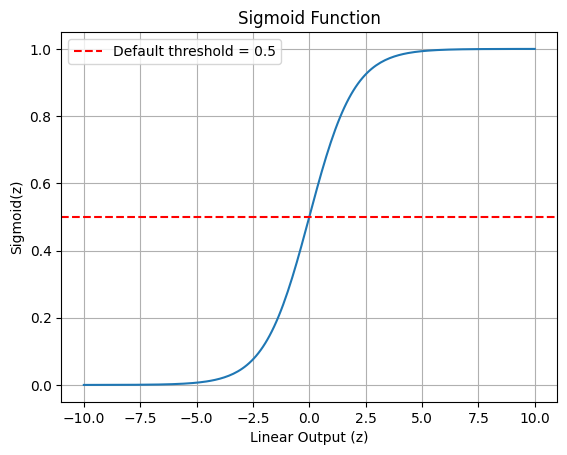

In [19]:
import numpy as np
import matplotlib.pyplot as plt

z = np.linspace(-10, 10, 200)
sigmoid = 1 / (1 + np.exp(-z))

plt.plot(z, sigmoid)
plt.title("Sigmoid Function")
plt.xlabel("Linear Output (z)")
plt.ylabel("Sigmoid(z)")
plt.grid()
plt.axhline(y=0.5, color='r', linestyle='--', label='Default threshold = 0.5')
plt.legend()
plt.show()


In [20]:
# Get predicted probabilities for positive class
y_probs = log_reg.predict_proba(X_test_scaled)[:, 1]

# Custom threshold
threshold = 0.3  # adjust between 0.1 to 0.9
y_pred_custom = (y_probs >= threshold).astype(int)


In [21]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

cm = confusion_matrix(y_test, y_pred_custom)
precision = precision_score(y_test, y_pred_custom)
recall = recall_score(y_test, y_pred_custom)
f1 = f1_score(y_test, y_pred_custom)

print("Confusion Matrix:\n", cm)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Confusion Matrix:
 [[71  1]
 [ 1 41]]
Precision: 0.9761904761904762
Recall: 0.9761904761904762
F1 Score: 0.9761904761904762


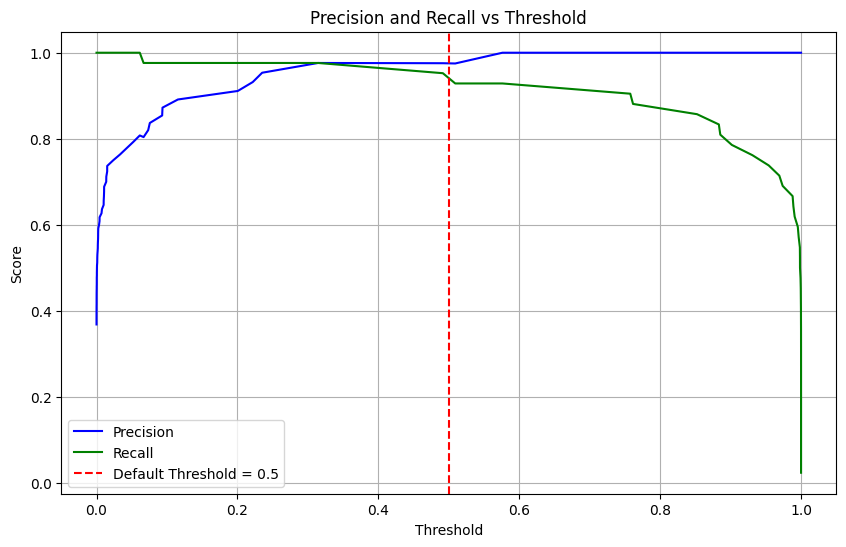

In [22]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_test, y_probs)

plt.figure(figsize=(10,6))
plt.plot(thresholds, precisions[:-1], label='Precision', color='blue')
plt.plot(thresholds, recalls[:-1], label='Recall', color='green')
plt.axvline(x=0.5, color='red', linestyle='--', label='Default Threshold = 0.5')
plt.title("Precision and Recall vs Threshold")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.legend()
plt.grid(True)
plt.show()


In [23]:
f1_scores = 2 * (precisions * recalls) / (precisions + recalls + 1e-8)
optimal_idx = np.argmax(f1_scores)
optimal_threshold = thresholds[optimal_idx]

print("Best Threshold (based on F1):", optimal_threshold)
print("Best F1 Score:", f1_scores[optimal_idx])


Best Threshold (based on F1): 0.31453248289469804
Best F1 Score: 0.9761904711904762


In [24]:
import pandas as pd
import numpy as np

# Get feature names and coefficients
feature_names = X.columns
coefficients = log_reg.coef_[0]

coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients,
    'Absolute Coefficient': np.abs(coefficients)
}).sort_values(by='Absolute Coefficient', ascending=False)

print(coef_df)


                    Feature  Coefficient  Absolute Coefficient
21            texture_worst     1.434093              1.434093
10                radius_se     1.233325              1.233325
28           symmetry_worst     1.061264              1.061264
7       concave points_mean     0.952813              0.952813
26          concavity_worst     0.911406              0.911406
13                  area_se     0.909029              0.909029
15           compactness_se    -0.906925              0.906925
23               area_worst     0.900477              0.900477
20             radius_worst     0.896968              0.896968
6            concavity_mean     0.782298              0.782298
12             perimeter_se     0.748295              0.748295
22          perimeter_worst     0.723111              0.723111
27     concave points_worst     0.703999              0.703999
19     fractal_dimension_se    -0.593876              0.593876
1              texture_mean     0.482219              0

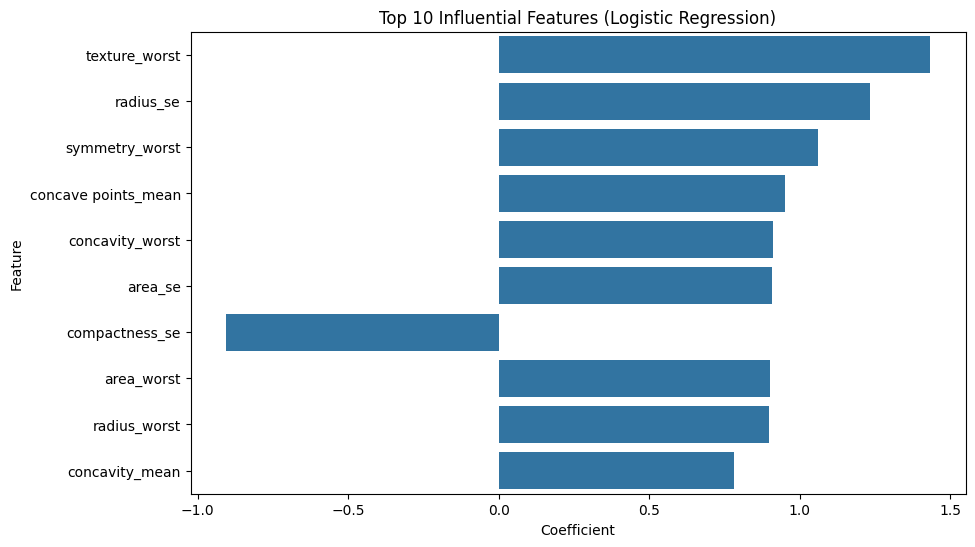

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.barplot(x='Coefficient', y='Feature', data=coef_df.head(10))
plt.title("Top 10 Influential Features (Logistic Regression)")
plt.show()


   fit_time  score_time  test_accuracy  test_precision  test_recall   test_f1
0  0.046983    0.040578       0.967033        1.000000     0.911765  0.953846
1  0.194854    0.058962       0.989011        0.971429     1.000000  0.985507
2  0.058687    0.034019       0.956044        1.000000     0.882353  0.937500
3  0.086363    0.044791       0.978022        0.970588     0.970588  0.970588
4  0.014720    0.015842       0.967033        0.942857     0.970588  0.956522


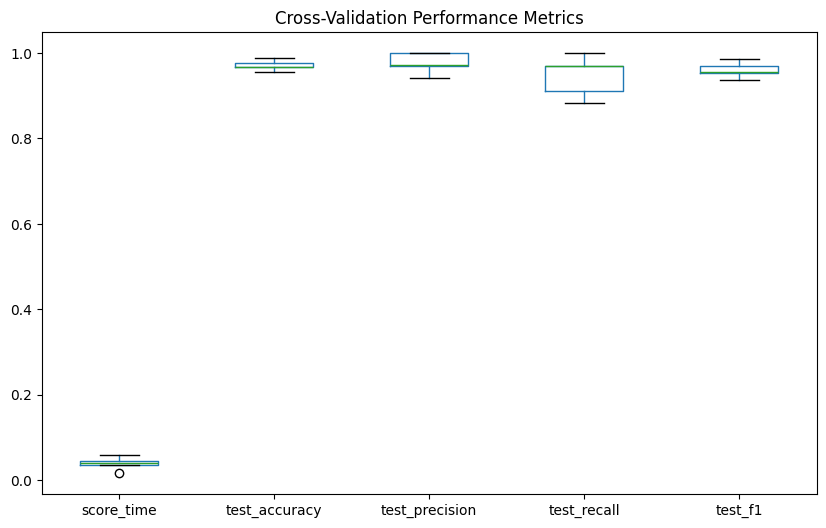

In [26]:
from sklearn.model_selection import cross_validate

cv_results = cross_validate(
    log_reg,
    X_train_scaled,
    y_train,
    cv=5,
    scoring=['accuracy', 'precision', 'recall', 'f1'],
    return_train_score=False
)

cv_df = pd.DataFrame(cv_results)
print(cv_df)

# Optional: Visualize CV performance
cv_df.drop(columns='fit_time').boxplot(figsize=(10, 6))
plt.title("Cross-Validation Performance Metrics")
plt.grid()
plt.show()


In [27]:
def predict_cancer(input_data):
    input_scaled = scaler.transform([input_data])
    prob = log_reg.predict_proba(input_scaled)[0][1]
    prediction = "Malignant" if prob >= 0.5 else "Benign"
    return prediction, prob

# Example usage:
sample_input = X_test.iloc[0].values
result, prob = predict_cancer(sample_input)
print("Prediction:", result)
print("Probability of being malignant:", round(prob, 3))


Prediction: Benign
Probability of being malignant: 0.0


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
